# <u> Description </u>

In this notebook we will try to understand what might be the different reasons due to which people committed suicide in India (using the dataset "Suicides in India"). Almost 11,89,068 people committed suicide in 2012 alone, it is quite important to understand why they commit suicide and try to mitigate.

## <u>About the Dataset</u>

This dataset contains yearly suicide details of all states/u.t of India by various parameters from 2001-2012.The parameters are as follows:-

- Gender
- Age Group
- Total
- Type Code - It mainly shows the causes which is categorised as Social,Educational,Professional,Social Status
- Type - It further categorise the Type code that is the causes


## <u>Importing Dataset and Libraries </u>

In [3]:
# import lib
import numpy as np #for math operations
import pandas as pd #for manipulating dataset
import matplotlib.pyplot as plt #for visualization
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_palette("BrBG")

# read dataset
df = pd.read_csv("Suicides-in-India-2001-2012.csv")

In [4]:
#display the top 5 records
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


## <u> Understanding Dataset </u>

In [5]:
df.shape

(237519, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


## <u>Checking for missing and duplicate values</u>
Lucky for us, the dataset does'nt have any missing or duplicate values

In [7]:
df.isna().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [8]:
#Check for the duplicate data if any
df.duplicated().any()

False

## <u> Exploratory Data Analysis </u>

Let us perform exploratory data analysis by asking some questions about the dataset


<b>What were the total number of suicides in India during this timeperiod? </b>

In [9]:
df['Total'].sum()

13071734

<b> What was the statewise distribution? </b>

In [10]:
df.groupby('State').Total.sum().sort_values(ascending=False)

State
Total (All India)    2911862
Total (States)       2858026
Maharashtra           901945
West Bengal           849936
Tamil Nadu            818691
Andhra Pradesh        814059
Karnataka             734825
Kerala                538946
Madhya Pradesh        451535
Gujarat               330858
Chhattisgarh          302354
Odisha                267234
Rajasthan             255134
Uttar Pradesh         233352
Assam                 172276
Haryana               147176
Delhi (Ut)             84272
Total (Uts)            53836
Jharkhand              49720
Punjab                 46350
Bihar                  46214
Tripura                45965
Puducherry             32144
Himachal Pradesh       26562
Uttarakhand            18496
Goa                    17363
Jammu & Kashmir        14821
Sikkim                  9606
A & N Islands           8109
Arunachal Pradesh       6633
Meghalaya               5415
Chandigarh              5164
Mizoram                 4154
D & N Haveli            3430
Manipur 

[]

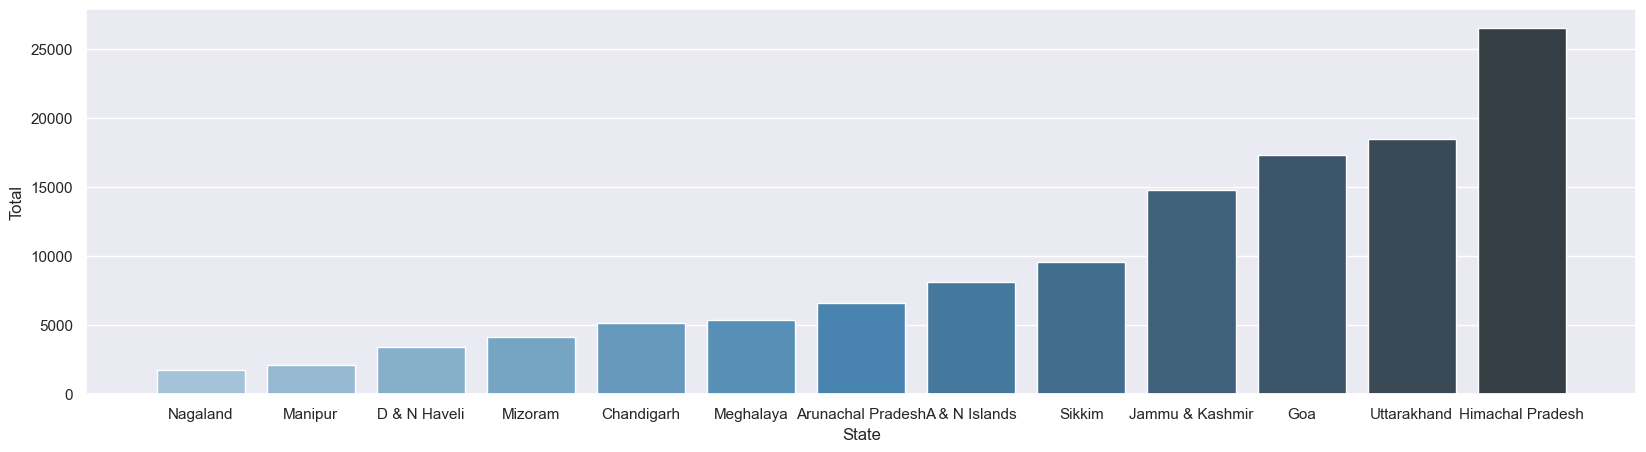

In [11]:

plt.figure(figsize=(20,5))
a=df.groupby('State')['Total'].sum().sort_values(ascending=True)[2:15]
sns.barplot(x=a.index,y=a,palette='Blues_d').plot()
#help(sns.barplot)

<b> What was the yearwise distribution of the suicides in this timeperiod </b>

In [12]:
D = df.groupby('Year').Total.sum()
D

Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64

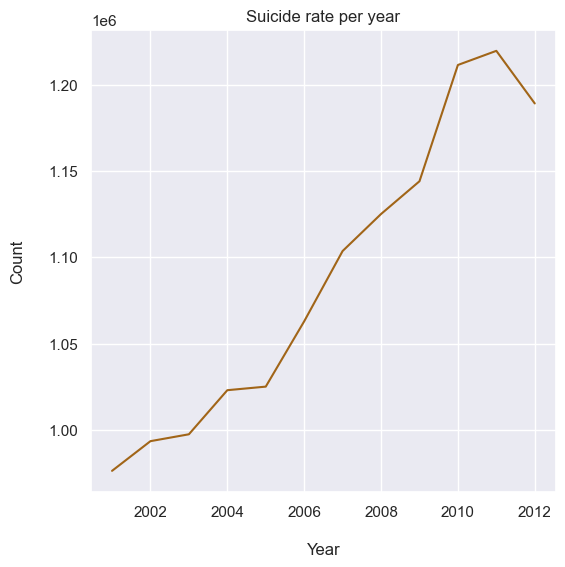

In [13]:
# plotting the Suicide rate by year

year = df.groupby('Year').sum()['Total'].plot(kind='line', figsize=(6,6), title = 'Suicide rate per year');
year.set_xlabel('\nYear')
year.set_ylabel('Count\n')
sns.set_style('whitegrid');x = D.index.values
y = D.values

<b> What are the total suicides In India genderwise? </b>

In [14]:
#Gender Suicide Frequency
df.groupby('Gender').sum()['Total']

Gender
Female    4702974
Male      8368760
Name: Total, dtype: int64

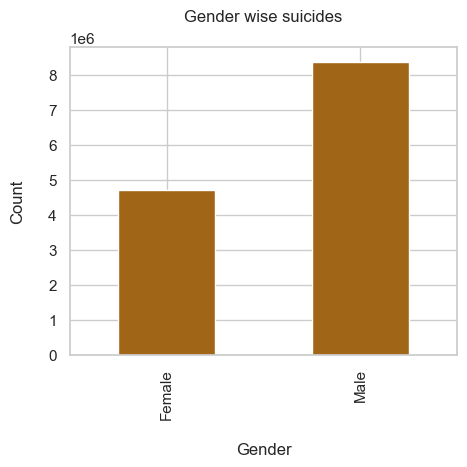

In [15]:
#Gender Suicide Frequency
gender = df.groupby('Gender').sum()['Total'].plot(kind="bar", figsize=(5,4), title ="Gender wise suicides\n");
gender.set_xlabel('\nGender')
gender.set_ylabel('Count\n')
sns.set_style('whitegrid')

<b>What was the age wise distribution for the suicides?</b>


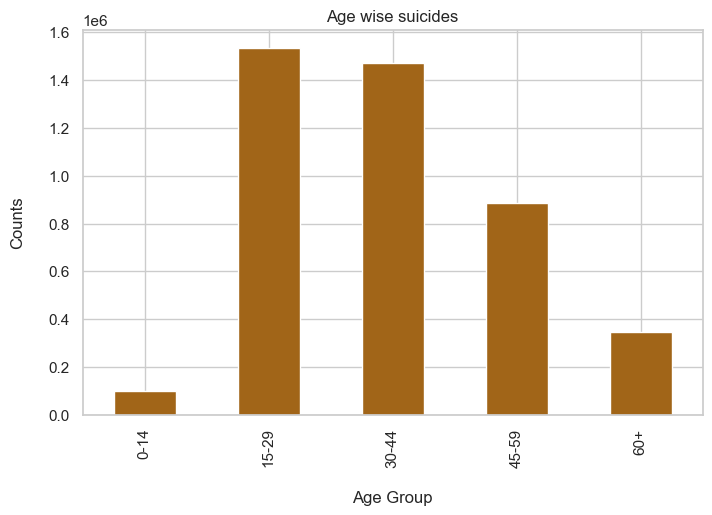

In [16]:
# Plotting Suicide by age
df_Age = df[df['Age_group']!='0-100+']

age = df_Age.groupby('Age_group').sum()['Total'].plot(kind="bar",figsize=(8,5), title ="Age wise suicides");
age.set_xlabel('\nAge Group')
age.set_ylabel('Counts\n')
sns.set_style('whitegrid')
sns.set_palette('Set1');


<b> What were the main causes behind the suicides? </b>

In [17]:
# split df by its type_code == Causes
cause = df[df['Type_code'] == 'Causes']

In [18]:
# function to plot

def plot_type(data, Title, X_label):
    p_type = data.groupby('Type').sum()['Total']
    sort_df = p_type.sort_values(ascending = False)

    fig = sort_df.plot(kind="bar", figsize = (10,6), title = Title + '\n', width = 0.75)
    fig.set_xlabel('\n' + X_label )
    fig.set_ylabel('Count\n')
    sns.set_style('whitegrid')
    sns.set_palette('Set2');

    

<b> What were the education status of the ones commiting suicide? </b>

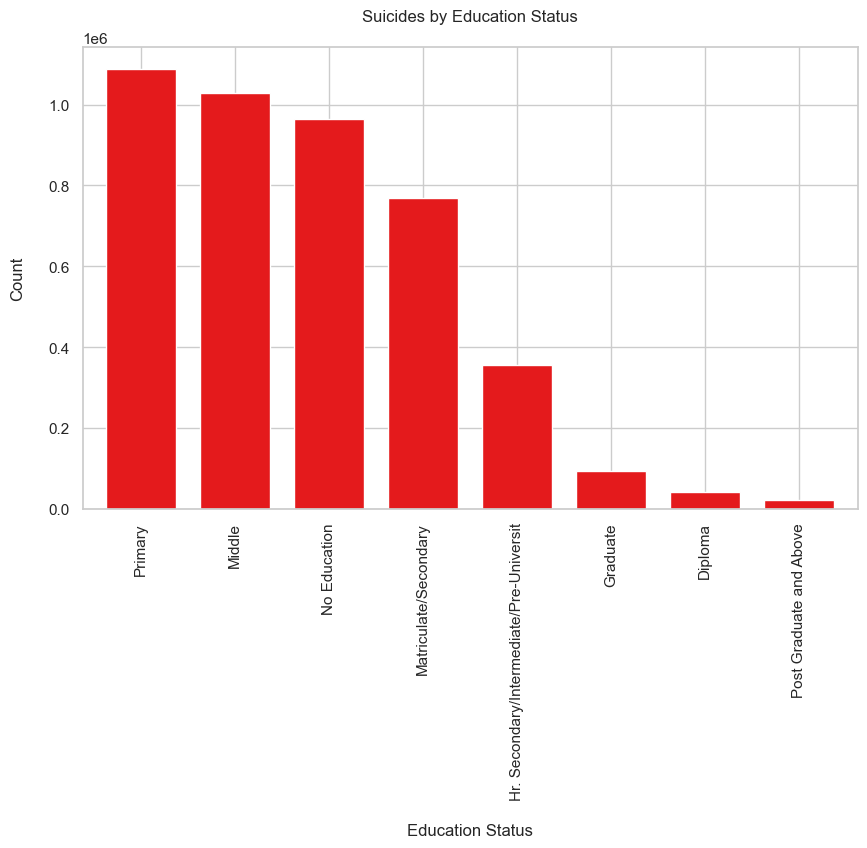

In [19]:
# split df by its type_code == Education_Status
cause = df[df['Type_code'] == 'Education_Status']
plot_type(cause,'Suicides by Education Status','Education Status')

<b> What was their professional profile? </b>

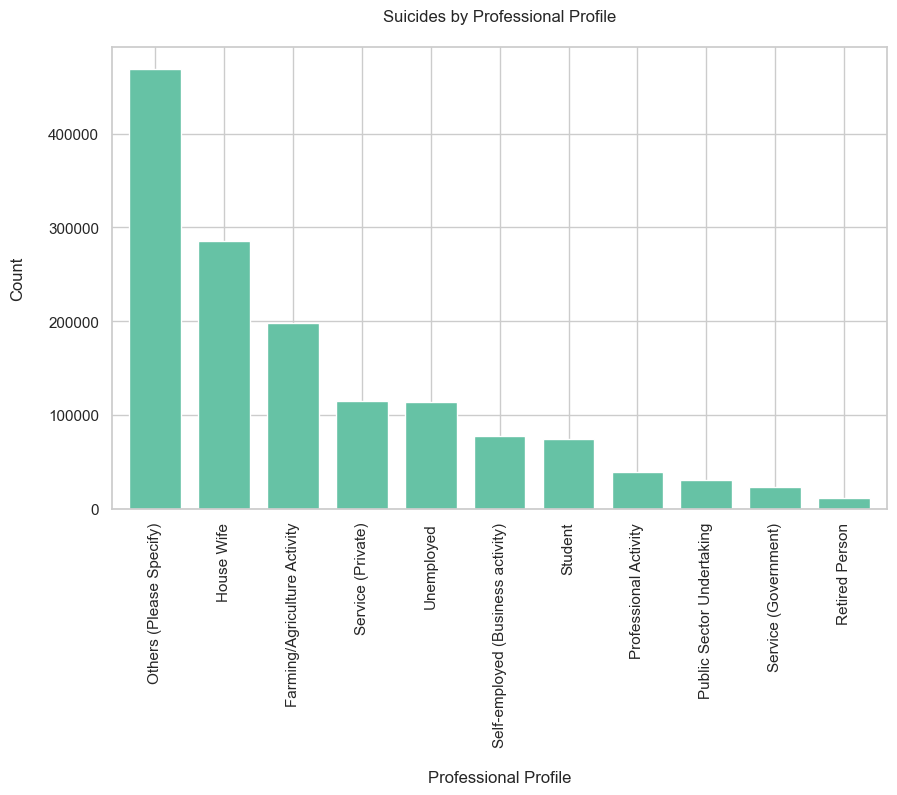

In [20]:
# split df by its type_code == Professional_Profile
cause = df[df['Type_code'] == 'Professional_Profile']
plot_type(cause,'Suicides by Professional Profile','Professional Profile')

<b> What was the social status of them? </b>

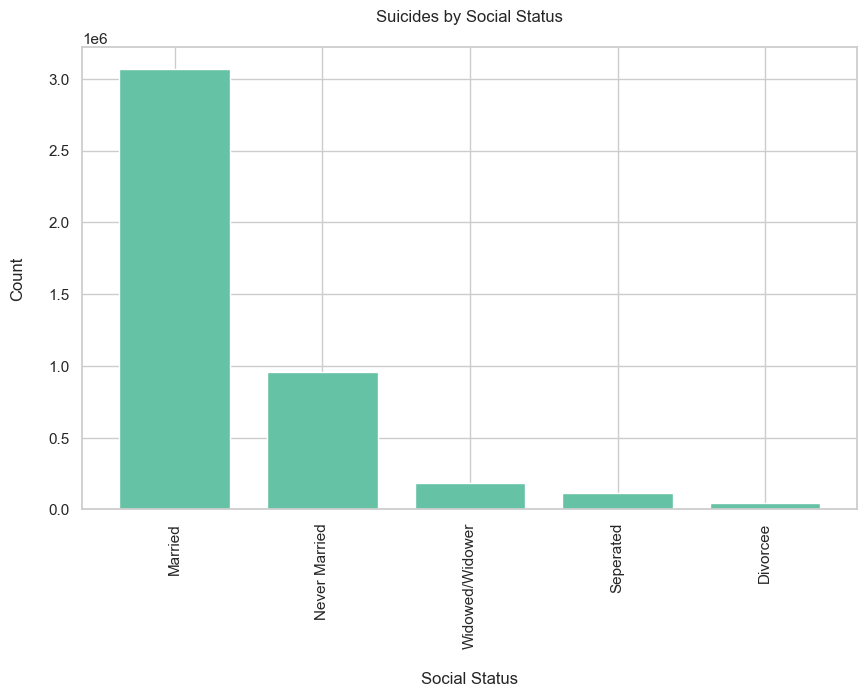

In [21]:
# split df by its type_code == Social_Status
cause = df[df['Type_code'] == 'Social_Status']
plot_type(cause,'Suicides by Social Status','Social Status')

### <b> Suicide distribution among children </b>

<b> How many children commited suicide? </b>

In [22]:
age_lower = df[df['Age_group']== '0-14'].count().sum()
age_lower

315189

<b> What were the reasons behind it? </b>

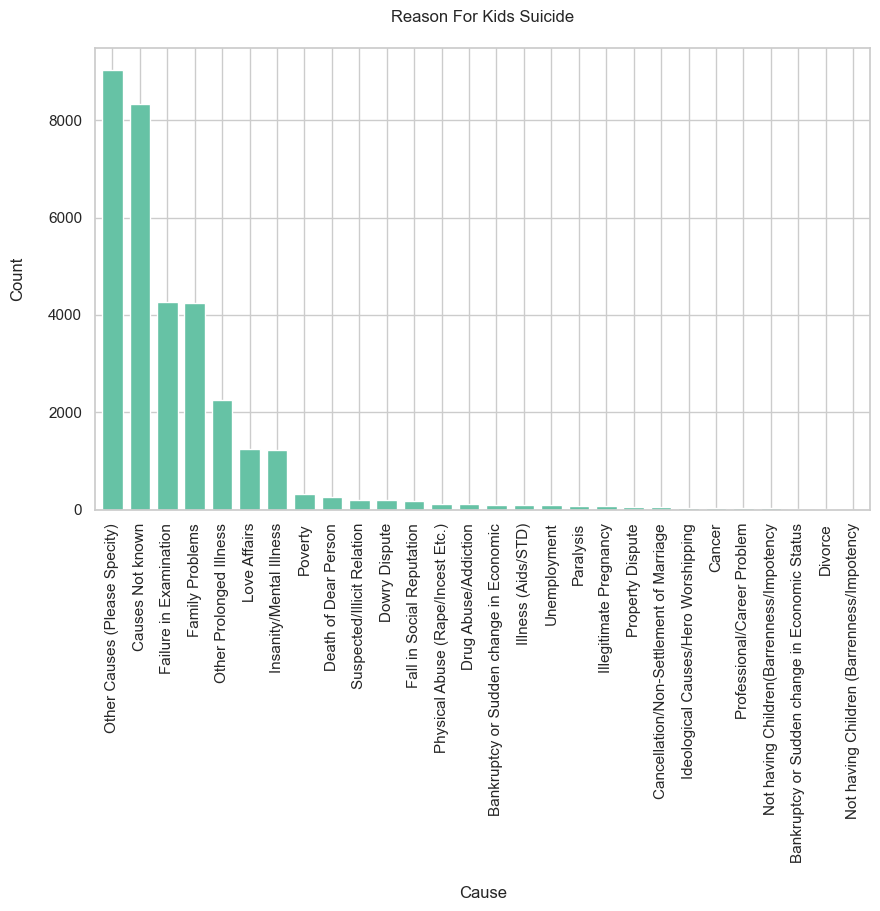

In [23]:
age_lower = df[df['Age_group']== '0-14']
age_lower_cause = age_lower[age_lower['Type_code'] == 'Causes']
plot_type(age_lower_cause, 'Reason For Kids Suicide', 'Cause')

## Machine Learning


In [24]:
D = df.groupby('Year').Total.sum()
D

Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64

In [25]:
x = D.index.values.reshape(-1,1)
y = D.values

In [26]:
x

array([[2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]], dtype=int64)

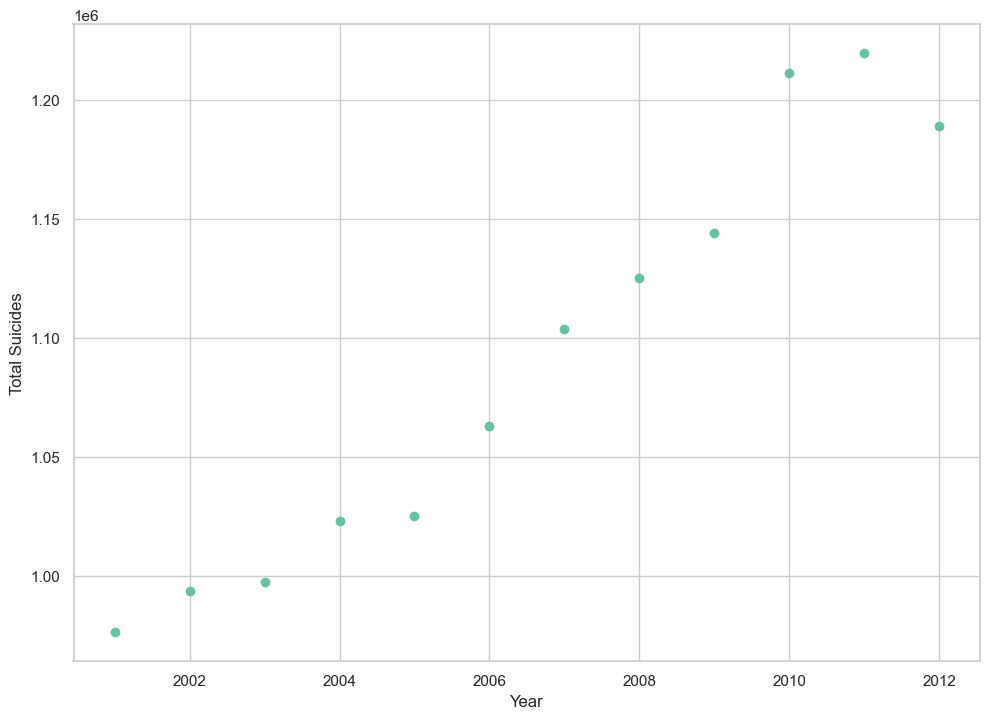

In [27]:
# Plotted the total suicides yearwise on a scatter plot
# Found that the suicides are increasing in the forth coming years
# There has been a decresing trend shown at the year 2012

plt.scatter(x,y)
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [29]:
reg.coef_

array([23818.18881119])

In [30]:
reg.intercept_

-46701884.682983674

In [31]:
y

array([ 976464,  993648,  997622, 1023137, 1025201, 1062991, 1103667,
       1125082, 1144033, 1211322, 1219499, 1189068], dtype=int64)

In [32]:
Yp = reg.predict(x)
Yp

array([ 958311.12820512,  982129.31701631, 1005947.5058275 ,
       1029765.69463869, 1053583.88344987, 1077402.07226107,
       1101220.26107226, 1125038.44988345, 1148856.63869463,
       1172674.82750582, 1196493.01631701, 1220311.2051282 ])

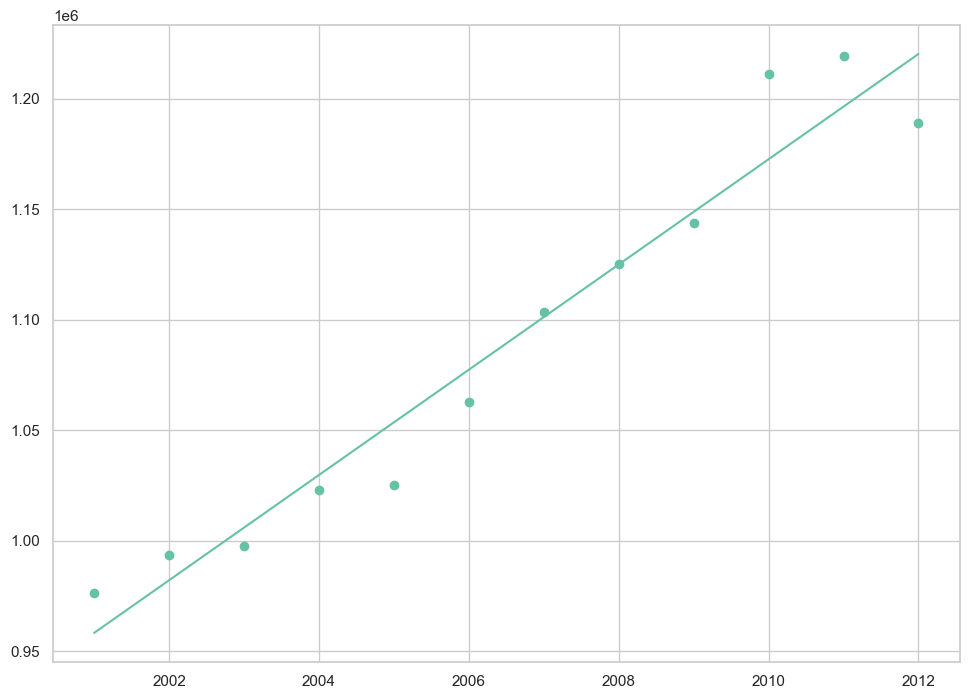

In [33]:
plt.scatter(x,y)
plt.plot(x,Yp)
plt.show()

In [34]:
# reg.score(x,y) is measuring the accuracy of the model against the training data
# How well the model explains the data it was trained with

reg.score(x,y) * 100

94.61522633937145

In [35]:
reg.predict([[2022]])

array([1458493.09324009])